# Defining Template Class

In [ ]:
#creating a class name template
class Template():
  #defining method function for load dataset using pandas
  def load(self, filepath, file_type):
    import pandas as pd
    if file_type == "csv":
       df = pd.read_csv(filepath)
       return df
    elif file_type == "excel":
       df = pd.read_excel(filepath)
    return df
  # method to check and get an overview of dataframe shape,values,range,count and mean
  def check_data(self,df,n):
    return print(f"shape of dataframe is {df.shape}  ,\n\n\nTop {n} entries are \n {df.head(n)} ,\n\n\nBottom {n} entries are \n{df.tail(n)} \n\n\nType of data columns is \n {df.dtypes}\n\n\n\n overview of dataset \n{df.describe()}")
  #To drop undesired columns
  def drop_columns(self,df, columns_to_drop):
    ndf = df.drop(columns=columns_to_drop)
    return ndf
  #to delete rows with specific value in df
  def delete_rows_with_values(df, column, values):
     return df[~df[column].isin(values)]
  #To drop null values in dataframe  by rows(will delete row if any value is empty)
  def drop_empty_rows(self,df):
    return df.dropna()
  # To find missing values in dataset by columns
  def find_missing_values(self,df):
    return df.isnull().sum()
  #to analyze missing values by column using mano module
  def analyze_missing_values(self,df, column):
    import missingno as msno
    subset_df = df[[column]]
    return msno.matrix(subset_df)
  #to analyze missing values by datframe using mano module
  def analyze_missing(self,df):
    import missingno as msno
    return msno.matrix(df)
  # find percentage of missing values in the dataaset
  def missing_percentage(self,df):
      import numpy as np
      total_cells = np.product(df.shape)
      total_missing = df.isnull().sum().sum()
      return (total_missing/total_cells) * 100

#####functions to fill missing values######

  #to fill missing values using their mean
  def fill_by_mean(self,df):
    fdf = df.fillna(df.mean())
    return fdf
  #fill misisng value by value after the missing value
  def fill_by_after(self,df):
    return df.fillna(method = 'bfill', axis=0).fillna(0)
  # fill missing values by most frequent occuring value in the column
  def fill_by_most_frequent(self,df, column):
    mode = df[column].mode()[0]
    return df.fillna({column: mode})
  # fill missing value by value of your choice in the dataset
  def fill_with_placeholder(self,df, column, placeholder_value):
    return df.fillna({column: placeholder_value})
  # fill missing values by droping any empty value rows
  def fill_by_drop_rows(self,df):
    return df.dropna()
  # fill by dropping all columns with missing values
  def fill_by_drop_columns(self,df):
    return df.dropna(axis=1)

 # fill by linear regression imputation
  def linear_regression_imputation(self,df, column):
      import pandas as pd
      from sklearn.linear_model import LinearRegression
                # Split the data into two sets: with and without missing values
      df_missing = df[df[column].isnull()]
      df_not_missing = df[~df[column].isnull()]
                # Create feature and target matrices for linear regression
      X_train = df_not_missing.drop(column, axis=1)
      y_train = df_not_missing[column]
      X_test = df_missing.drop(column, axis=1)
                # Fit a linear regression model
      model = LinearRegression()
      model.fit(X_train, y_train)
                # Predict the missing values
      y_pred = model.predict(X_test)
                # Fill in the missing values in the column
      df_filled = df.copy()
      df_filled.loc[df[column].isnull(), column] = y_pred
      return df_filled

  #fill by K-Means Imputation
  def knn_imputation(self,df, column):
    import pandas as pd
    from sklearn.impute import KNNImputer
            # Create a copy of the DataFrame to avoid modifying
    df_filled = df.copy()
            # Create feature matrix and target array for KNN imputation
    X = df.drop(column, axis=1)
    y = df[column]
            # Perform KNN imputation
    imputer = KNNImputer()
    X_imputed = imputer.fit_transform(X)
           # Replace the column with imputed values
    df_filled[column] = X_imputed[:, X.columns.get_loc(column)]
    return df_filled



  # to change the datatype of the column
  def convert_column_dtype(self,df, column, dtype):
    import pandas as pd
    import numpy as np
          # Get the previous data type of the column
    prev_dtype = df[column].dtype.name
          # Convert non-finite values to NaN
    df[column] = pd.to_numeric(df[column], errors='coerce')
          # Convert the column to the target data type
    df[column] = df[column].astype(dtype)
          # Print the dtype change message
    print(f"Column '{column}' dtype has been changed from '{prev_dtype}' to '{dtype}'")
    return df
  #to get numerical and categorical columns in the dataset
  def separate_types(self,df):
    num_cols = [col for col in df.columns if "int" in str(df[col].dtype) or "float" in str(df[col].dtype)]
    cat_cols = [col for col in df.columns if "object" == str(df[col].dtype)]
    print("numerical columns \n",num_cols)
    print("categorical columns\n",cat_cols)

  # to find unique non integer values in our columns
  def find_unique_non_integer_values(self,df, column_name):
      import pandas as pd
      non_integer_values = df[column_name][pd.to_numeric(df[column_name], errors='coerce').isna()].unique()
      return non_integer_values
  # to find date columns in df
  def find_date_columns(self,df):
    date_columns = [col for col in df.columns if 'date' in col.lower() or 'Date' in col]
    return date_columns
  #convert date columns into day,month , year column name wise
  def process_date_columns(self,df, date_columns):
    for c in date_columns:
        df[c + '_day'] = pd.to_datetime(df[c], format='%m/%d/%Y').dt.day
        df[c + '_month'] = pd.to_datetime(df[c], format='%m/%d/%Y').dt.month
        df[c + '_year'] = pd.to_datetime(df[c], format='%m/%d/%Y').dt.year
        df[c] = pd.to_datetime(df[c], format='%m/%d/%Y')
        df[c + '_seconds'] = df[c].astype(int)


  #plot the countplot of a column in df
  def create_countplot(slef,df, column_name, figsize=(5, 5)):
    import seaborn as sns
    import matplotlib.pyplot as plt
    sns.set(rc={'figure.figsize': figsize})
    sns.countplot(x=column_name, data=df)
    plt.show()
  # to check distribution of numerical features.
  def numerical_features_distribution(self,df):
    list(set(df.dtypes.tolist()))
    df_num = df.select_dtypes(include = ['float64', 'int64'])
    return df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)
  #checking distrubition of unique values across the column in dataframe
  def check_value_distribution(self,df,column_name):
    return print(r_df['Current Status'].value_counts() / r_df.shape[0])
  # find percentage of missing values


In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import datetime as dt

In [ ]:
data = Template()
df =data.load(r'boston.csv','csv')

<ipython-input-94-4fa0548ea5c4>:7: DtypeWarning: Columns (22,32) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


# EDA

Lets explore and understand our dataset more

In [ ]:
data.check_data(df,3)

shape of dataframe is (198900, 43)  ,


Top 3 entries are 
   Permit Number  Permit Type            Permit Type Definition  \
0  201505065519            4                      sign - erect   
1  201604195146            4                      sign - erect   
2  201605278609            3  additions alterations or repairs   

  Permit Creation Date Block  Lot  Street Number Street Number Suffix  \
0           05/06/2015  0326  023            140                  NaN   
1           04/19/2016  0306  007            440                  NaN   
2           05/27/2016  0595  203           1647                  NaN   

  Street Name Street Suffix  ...  Existing Construction Type  \
0       Ellis            St  ...                         3.0   
1       Geary            St  ...                         3.0   
2     Pacific            Av  ...                         1.0   

  Existing Construction Type Description Proposed Construction Type  \
0                          constr type 3              

so basically we have 43 columns/variables in our dataset and total of 198900 observations.


# Droping undesired Columns

In [ ]:
#dropping columns which are not important to us based on above observations
r_df = data.drop_columns(df,['Street Number Suffix', 'Unit', 'Unit Suffix', 'Completed Date',
                     'Structural Notification', 'Voluntary Soft-Story Retrofit',
                     'TIDF Compliance', 'Proposed Construction Type', 'Existing Construction Type',
                     'Fire Only Permit', 'Record ID', 'Permit Number', 'Permit Type Definition'])

In [ ]:
data.check_data(r_df,3)

We can predict the current status of the Building Permit based on this data/ features

In [ ]:
#separating numerical and categorical type columns
data.separate_types(r_df)

numerical columns 
 ['Permit Type', 'Street Number', 'Number of Existing Stories', 'Number of Proposed Stories', 'Estimated Cost', 'Revised Cost', 'Existing Units', 'Proposed Units', 'Plansets', 'Supervisor District', 'Zipcode']
categorical columns
 ['Permit Creation Date', 'Block', 'Lot', 'Street Name', 'Street Suffix', 'Description', 'Current Status', 'Current Status Date', 'Filed Date', 'Issued Date', 'First Construction Document Date', 'Permit Expiration Date', 'Existing Use', 'Proposed Use', 'Existing Construction Type Description', 'Proposed Construction Type Description', 'Site Permit', 'Neighborhoods - Analysis Boundaries', 'Location']


let clean our Current Status, target feature first

In [ ]:
r_df['Current Status'].unique()

array(['expired', 'issued', 'withdrawn', 'complete', 'filed', 'approved',
       'reinstated', 'cancelled', 'appeal', 'suspend', 'revoked',
       'plancheck', 'disapproved', 'incomplete'], dtype=object)

In [ ]:
r_df = r_df[(r_df['Current Status'] != 'filed') &
       (r_df['Current Status'] != 'withdrawn') &
       (r_df['Current Status'] != 'expired') &
       (r_df['Current Status'] != 'plancheck') &
       (r_df['Current Status'] != 'disapproved') &
       (r_df['Current Status'] != 'appeal') ]

In [ ]:
r_df.shape

(183713, 30)

In [ ]:
r_df['Current Status'] = r_df['Current Status'].map({'cancelled': 1, 'suspend': 1, 'revoked': 1,
                                               'complete': 0, 'issued': 0, 'approved': 0,
                                               'reinstated': 0, 'incomplete': 0})



In [ ]:
r_df['Current Status'].info()

<class 'pandas.core.series.Series'>
Int64Index: 183713 entries, 1 to 198899
Series name: Current Status
Non-Null Count   Dtype
--------------   -----
183713 non-null  int64
dtypes: int64(1)
memory usage: 2.8 MB


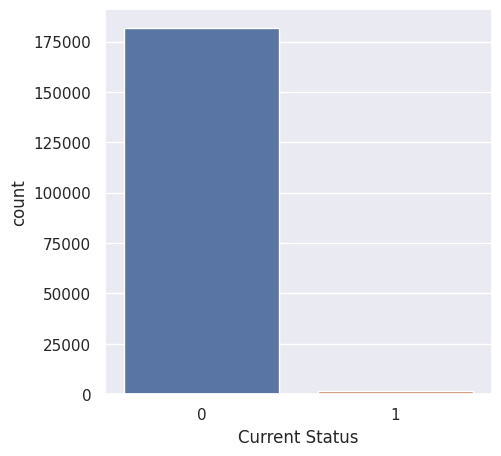

In [ ]:
data.create_countplot(r_df,'Current Status')

In [ ]:
#checking distribution of values in Current Status
data.check_value_distribution(r_df,'Current Status')

0    0.990316
1    0.009684
Name: Current Status, dtype: float64


# Missing Value Analysis

SO we have our dataset now, What we can do at first is to analyze missing values inside each column of our dataset to get an idea of what type and how much missing values correction is required


In [ ]:
data.find_missing_values(r_df)

Permit Type                                    0
Permit Creation Date                           0
Block                                          0
Lot                                            0
Street Number                                  0
Street Name                                    0
Street Suffix                               2582
Description                                   89
Current Status                                 0
Current Status Date                            0
Filed Date                                     0
Issued Date                                 1124
First Construction Document Date            1146
Number of Existing Stories                 40834
Number of Proposed Stories                 40966
Permit Expiration Date                     38076
Estimated Cost                             37065
Revised Cost                                 382
Existing Use                               39267
Existing Units                             48835
Proposed Use        

<Axes: >

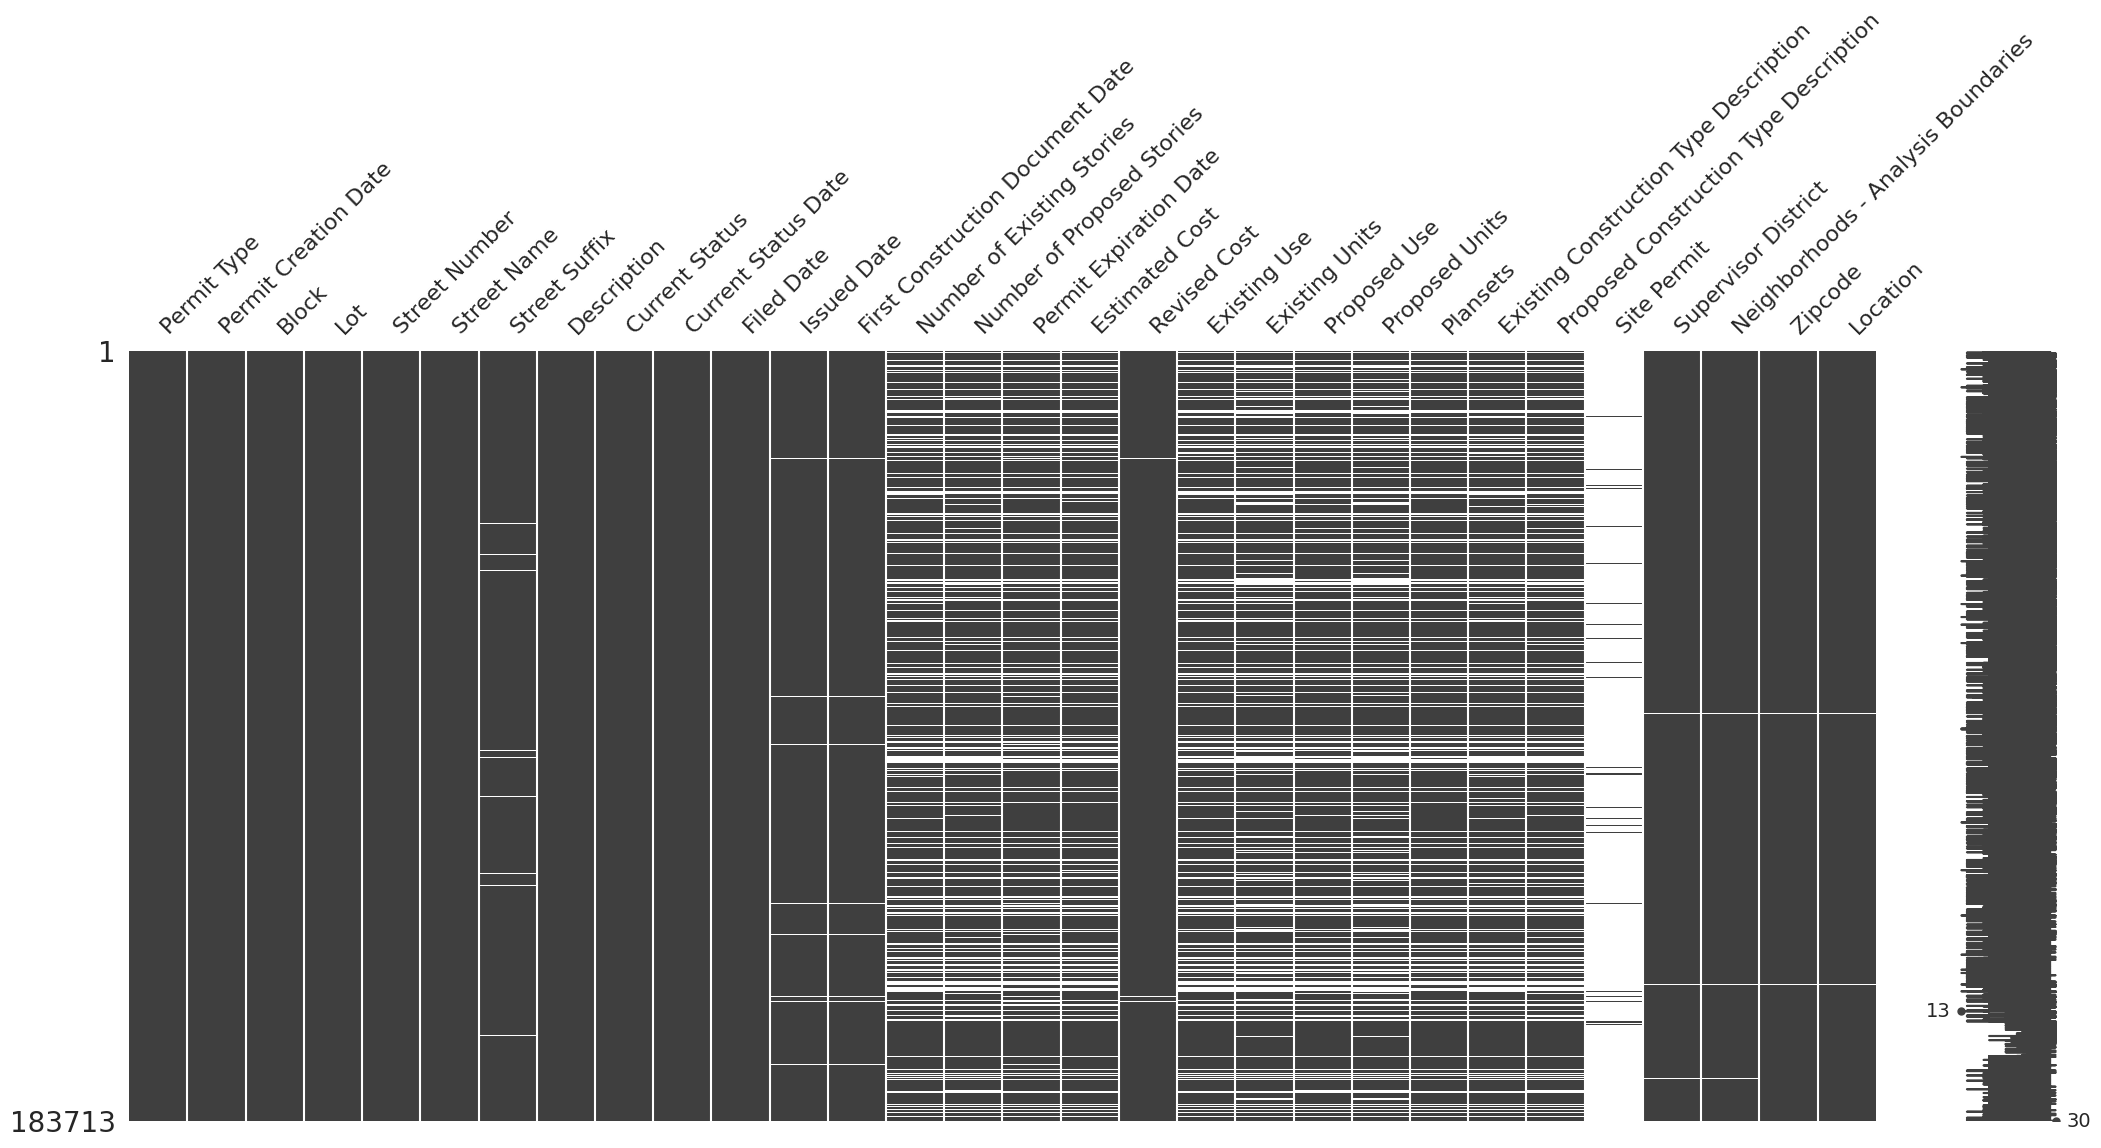

In [ ]:
data.analyze_missing(r_df)

In [ ]:
data.missing_percentage(r_df)

11.715719627897862

here we can clearly see that our dataset has almost 12 percentage missing value .

In [ ]:
data.missing_percentage(r_df["Site Permit"])

98.1286027662713

In [ ]:
r_df = data.drop_columns(r_df,["Site Permit"])

So 98 percent 🤡 values are missing in this Site Permit column. we can drop this column from our dataframe

In [ ]:
  # fill missing values by droping any empty value rows
r_df = data.fill_by_drop_rows(r_df)
print(r_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128207 entries, 3 to 198882
Data columns (total 29 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Permit Type                             128207 non-null  int64  
 1   Permit Creation Date                    128207 non-null  object 
 2   Block                                   128207 non-null  object 
 3   Lot                                     128207 non-null  object 
 4   Street Number                           128207 non-null  int64  
 5   Street Name                             128207 non-null  object 
 6   Street Suffix                           128207 non-null  object 
 7   Description                             128207 non-null  object 
 8   Current Status                          128207 non-null  int64  
 9   Current Status Date                     128207 non-null  object 
 10  Filed Date                              1282

<Axes: >

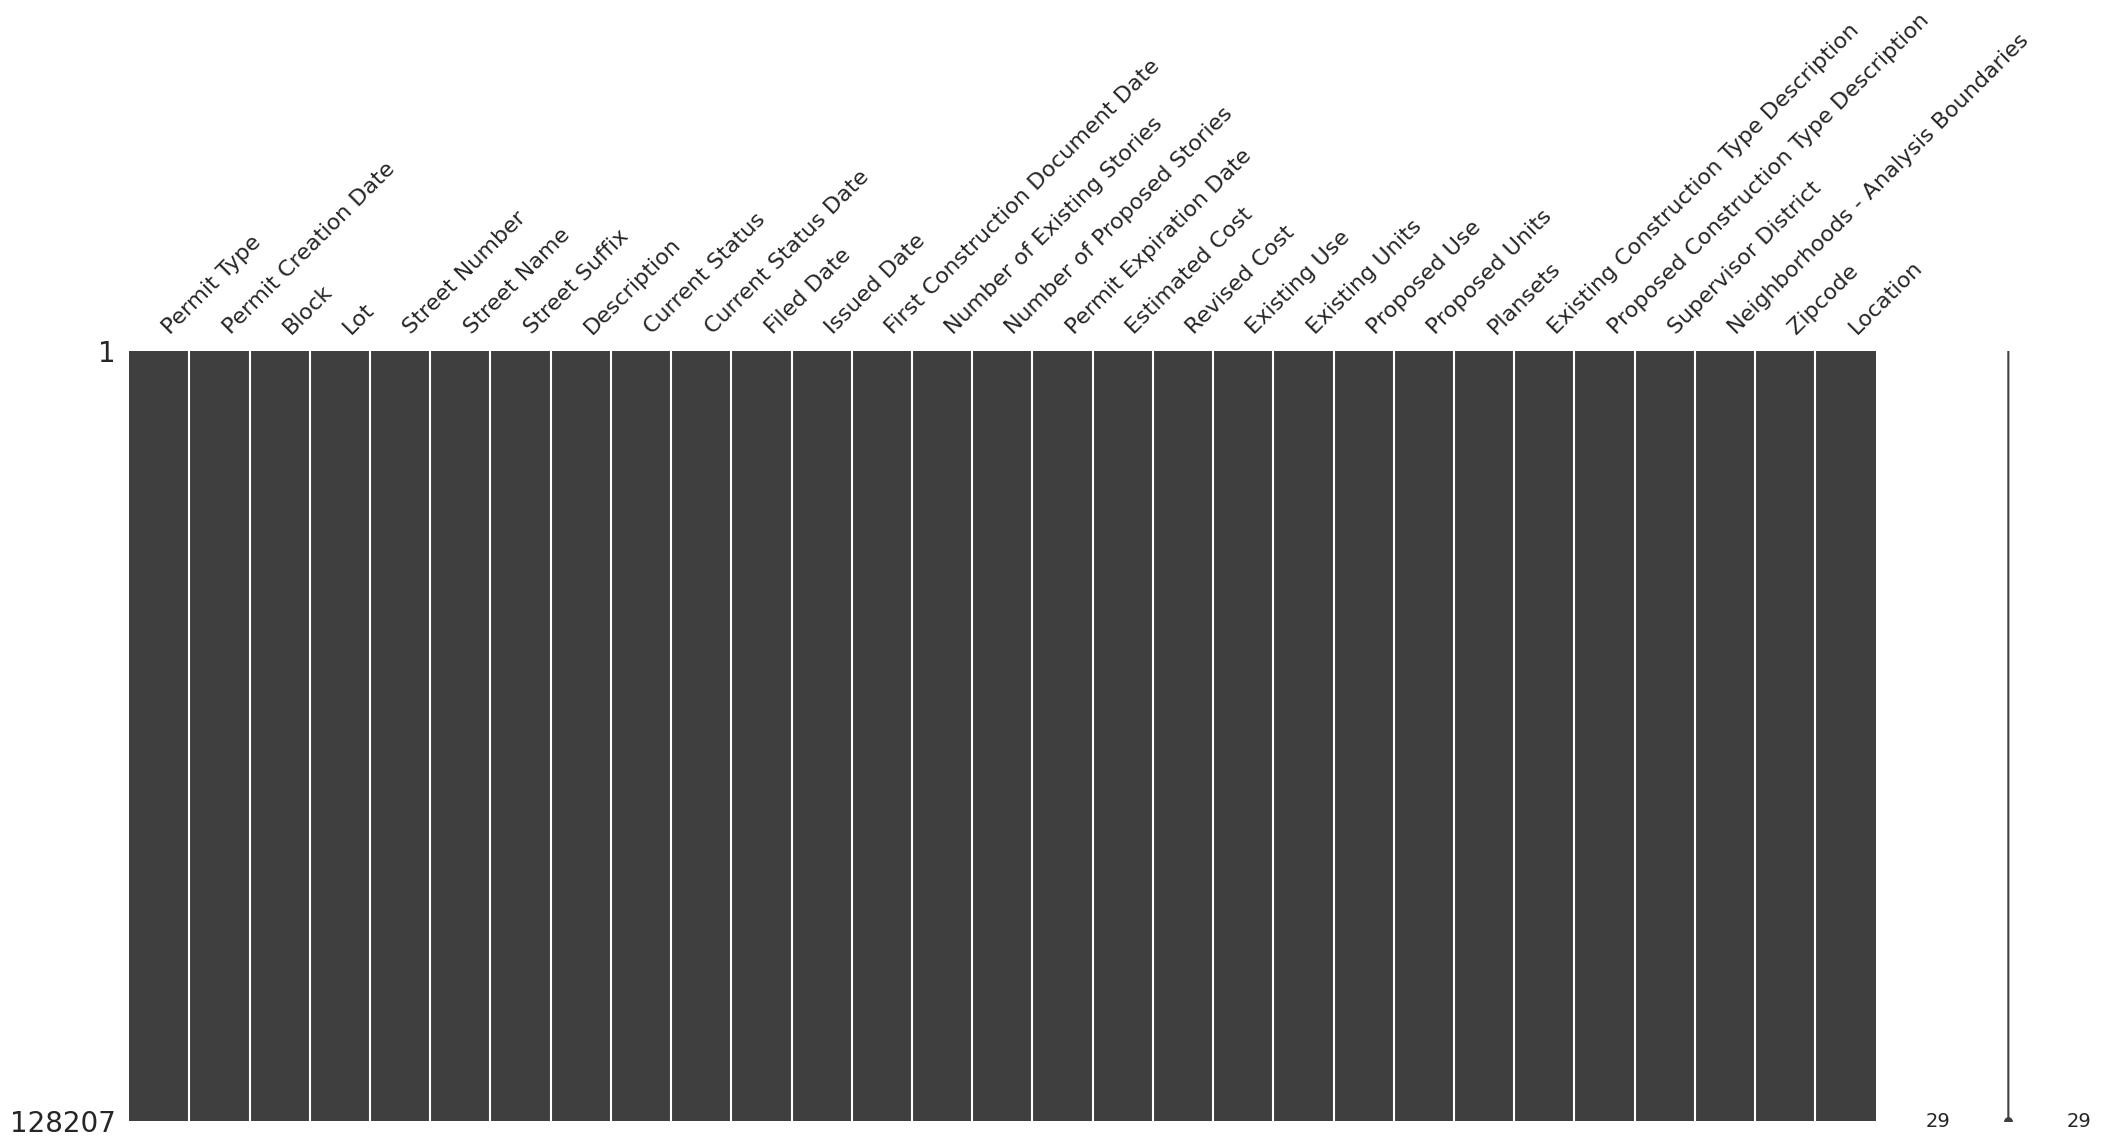

In [ ]:
data.analyze_missing(r_df)




# Data CLeaning

In [ ]:
r_df['Permit Type'].value_counts()

8    120372
3      7834
2         1
Name: Permit Type, dtype: int64

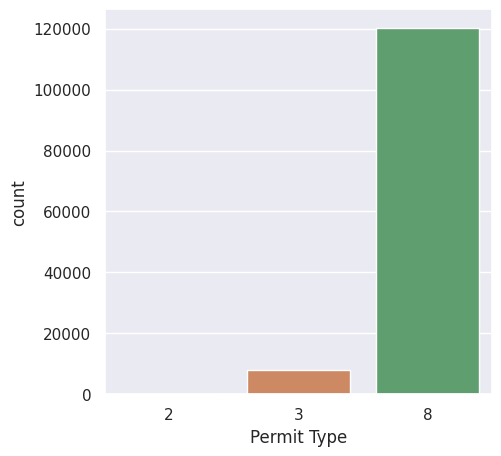

In [ ]:
data.create_countplot(r_df,'Permit Type')

In [ ]:
r_df["Block"].dtype

dtype('O')

In [ ]:
# lets convert Location into Lattitude and Longitude to get better features
def coord1_parse(line):
    return [float(bit.rstrip(',')) for bit in line[1:-1].split()][0]

def coord2_parse(line):
    return [float(bit.rstrip(',')) for bit in line[1:-1].split()][1]

r_df['Latitude'] = r_df.Location.map(coord1_parse)
r_df['Longitude'] = r_df.Location.map(coord2_parse)

In [ ]:
#lets find date columns in our dataset
date_columns=data.find_date_columns(r_df)
print(date_columns)

['Permit Creation Date', 'Current Status Date', 'Filed Date', 'Issued Date', 'First Construction Document Date', 'Permit Expiration Date']


In [ ]:
# converting date columns into seconds,day,month and year column by column names
data.process_date_columns(r_df,date_columns)

In [ ]:
r_df.head(1)

,Permit Type,Permit Creation Date,Block,Lot,Street Number,Street Name,Street Suffix,Description,Current Status,Current Status Date,...,Issued Date_year,Issued Date_seconds,First Construction Document Date_day,First Construction Document Date_month,First Construction Document Date_year,First Construction Document Date_seconds,Permit Expiration Date_day,Permit Expiration Date_month,Permit Expiration Date_year,Permit Expiration Date_seconds
3,8,2016-11-07,0156,011,1230,Pacific,Av,repair dryrot & stucco at front of bldg.,0,2017-07-24,...,2017,1500336000000000000,18,7,2017,1500336000000000000,13,7,2018,1531440000000000000


<Axes: xlabel='Issued Date_month', ylabel='count'>

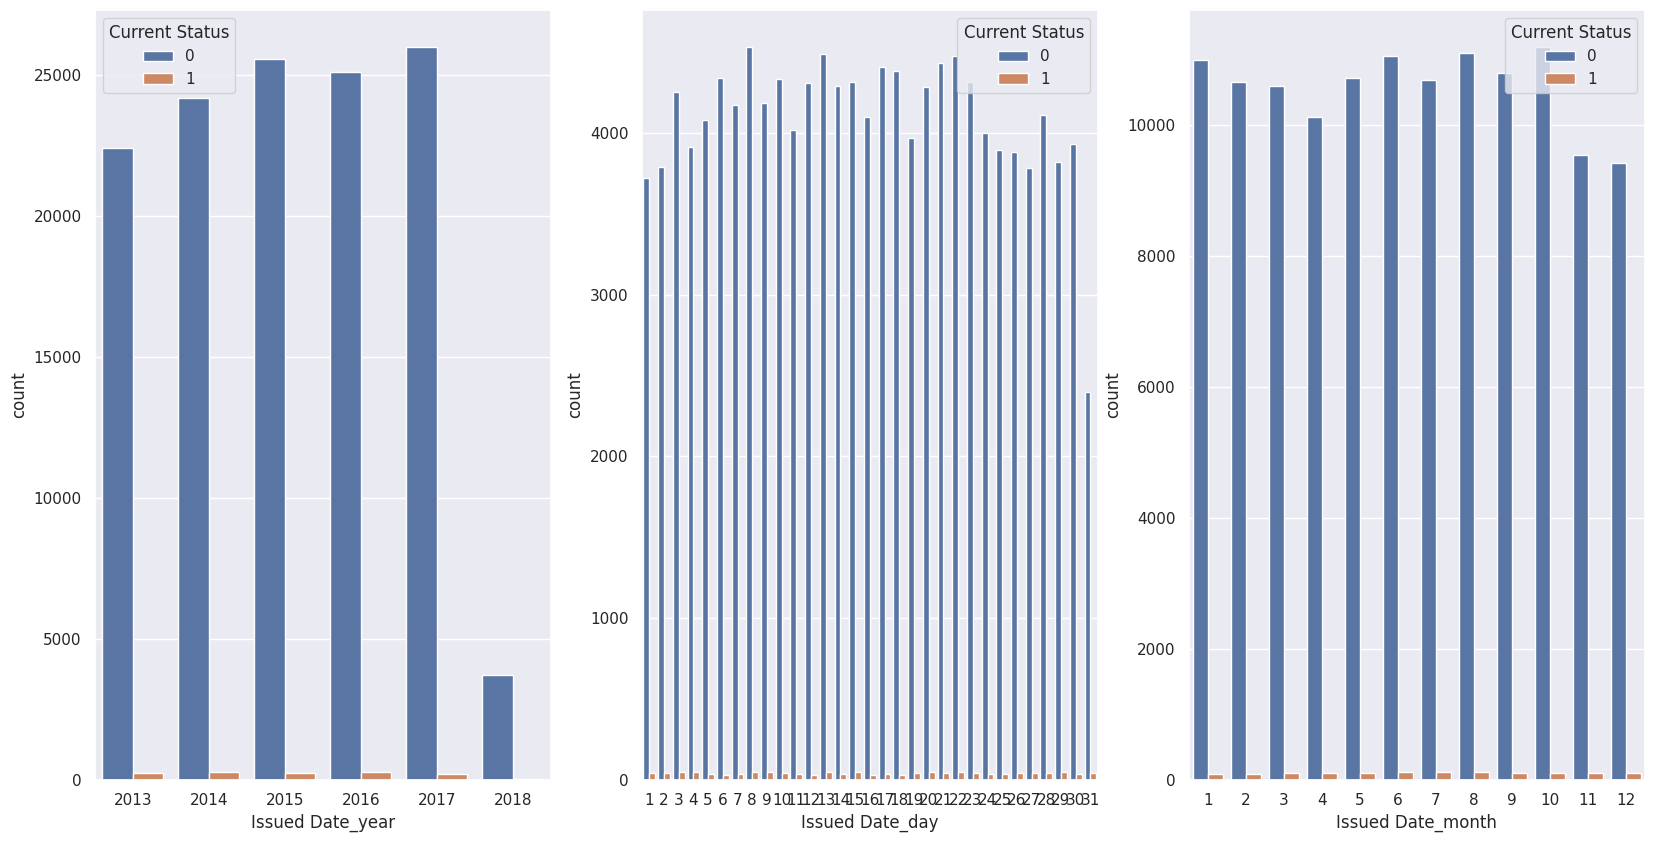

In [ ]:
sns.set(rc={'figure.figsize':(20, 10)})

fig, axs = plt.subplots(ncols=3)
sns.countplot(x="Issued Date_year", hue="Current Status", data=r_df, ax=axs[0])
sns.countplot(x="Issued Date_day", hue="Current Status", data=r_df, ax=axs[1])
sns.countplot(x="Issued Date_month", hue="Current Status", data=r_df, ax=axs[2])

In [ ]:
r_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26686 entries, 3 to 39057
Data columns (total 55 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Permit Type                               26686 non-null  int64         
 1   Permit Creation Date                      26686 non-null  datetime64[ns]
 2   Block                                     26686 non-null  object        
 3   Lot                                       26686 non-null  object        
 4   Street Number                             26686 non-null  int64         
 5   Street Name                               26686 non-null  object        
 6   Street Suffix                             26686 non-null  object        
 7   Description                               26686 non-null  object        
 8   Current Status                            26686 non-null  int64         
 9   Current Status Date         

In [ ]:
#dropping the previous date_columns
r_df = data.drop_columns(r_df,['Permit Creation Date','Current Status Date','Filed Date','Issued Date',
                             'First Construction Document Date','Permit Expiration Date'])

In [ ]:
# Also dropping description
r_df = data.drop_columns(r_df,'Description')

array([[<Axes: title={'center': 'Permit Type'}>,
        <Axes: title={'center': 'Street Number'}>,
        <Axes: title={'center': 'Current Status'}>,
        <Axes: title={'center': 'Number of Existing Stories'}>,
        <Axes: title={'center': 'Number of Proposed Stories'}>,
        <Axes: title={'center': 'Estimated Cost'}>],
       [<Axes: title={'center': 'Revised Cost'}>,
        <Axes: title={'center': 'Existing Units'}>,
        <Axes: title={'center': 'Proposed Units'}>,
        <Axes: title={'center': 'Plansets'}>,
        <Axes: title={'center': 'Supervisor District'}>,
        <Axes: title={'center': 'Zipcode'}>],
       [<Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Longitude'}>,
        <Axes: title={'center': 'Permit Creation Date_day'}>,
        <Axes: title={'center': 'Permit Creation Date_month'}>,
        <Axes: title={'center': 'Permit Creation Date_year'}>,
        <Axes: title={'center': 'Permit Creation Date_seconds'}>],
       [<Axes: 

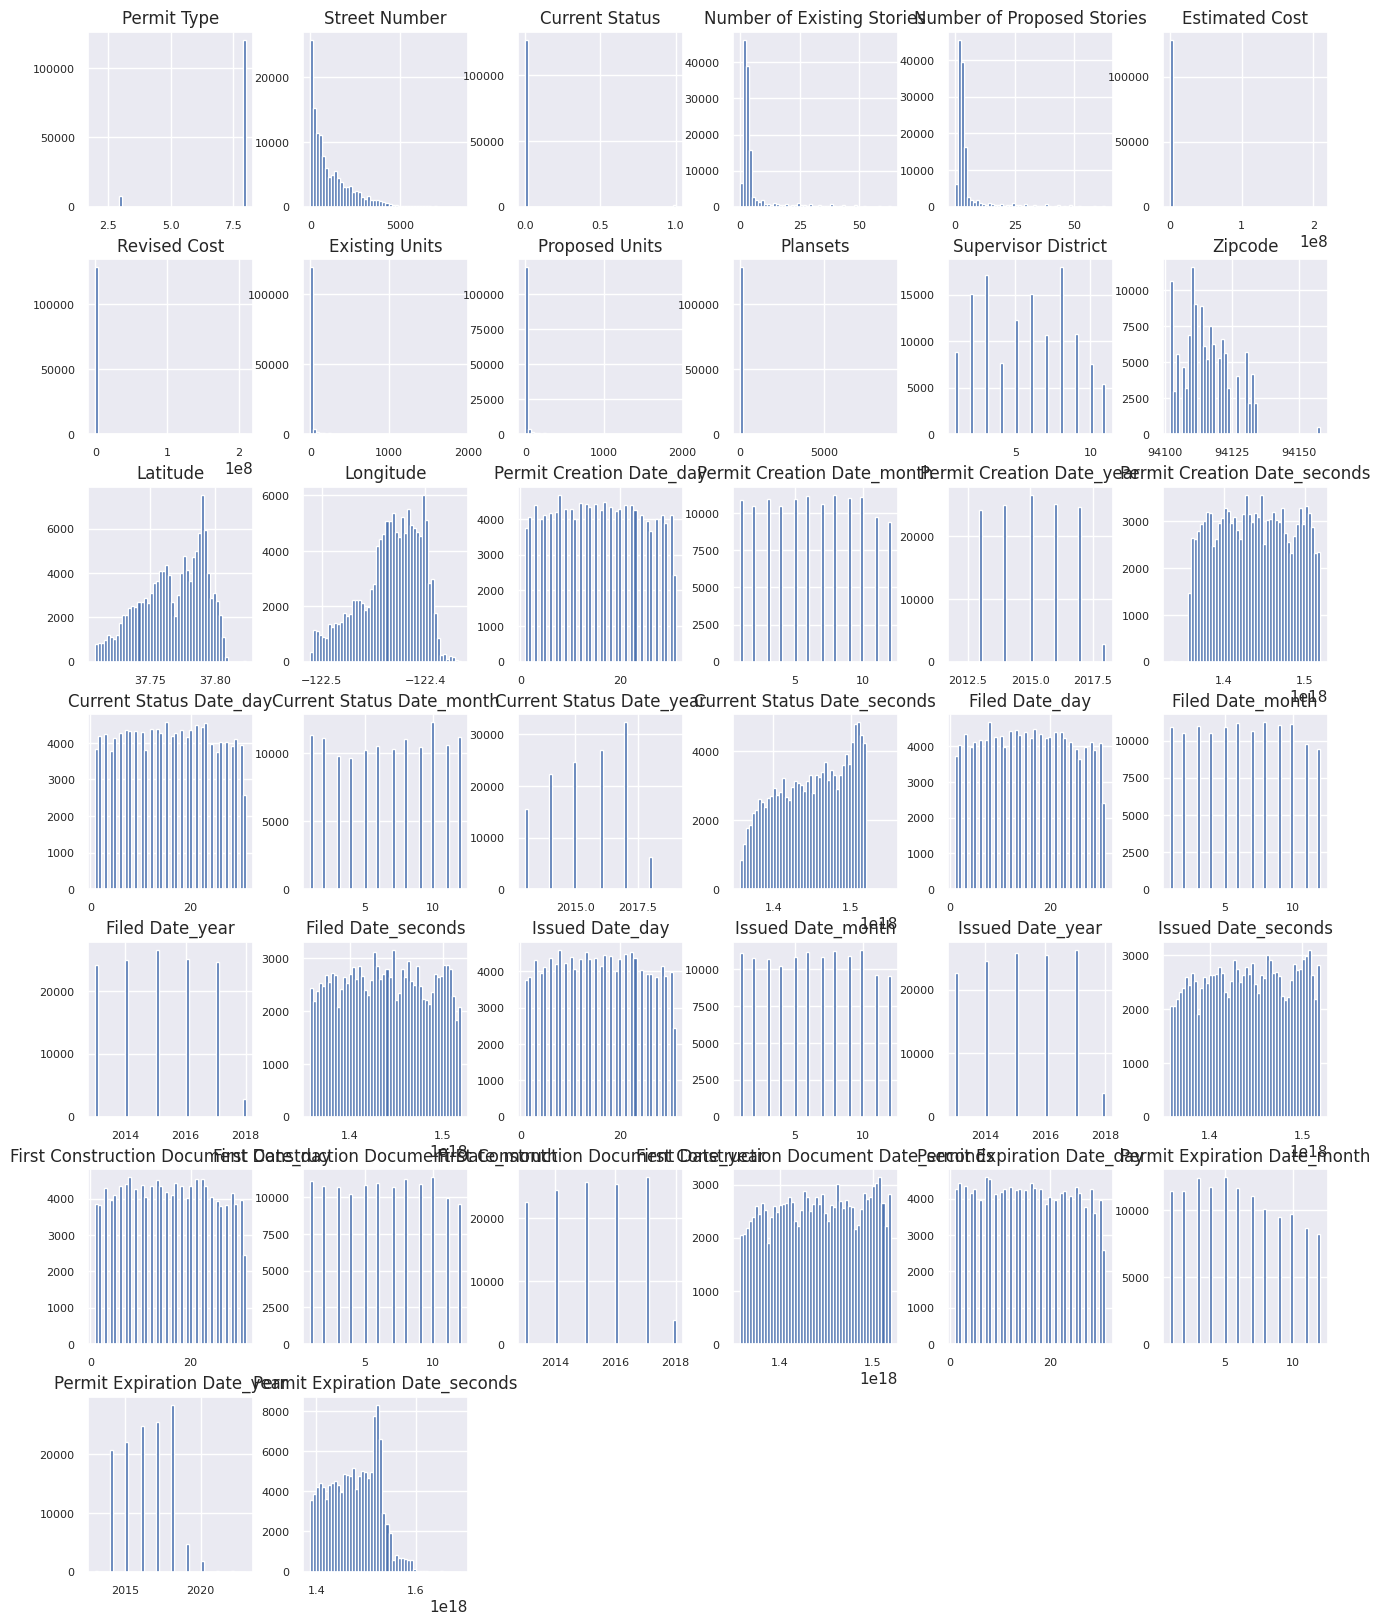

In [ ]:
data.numerical_features_distribution(r_df)

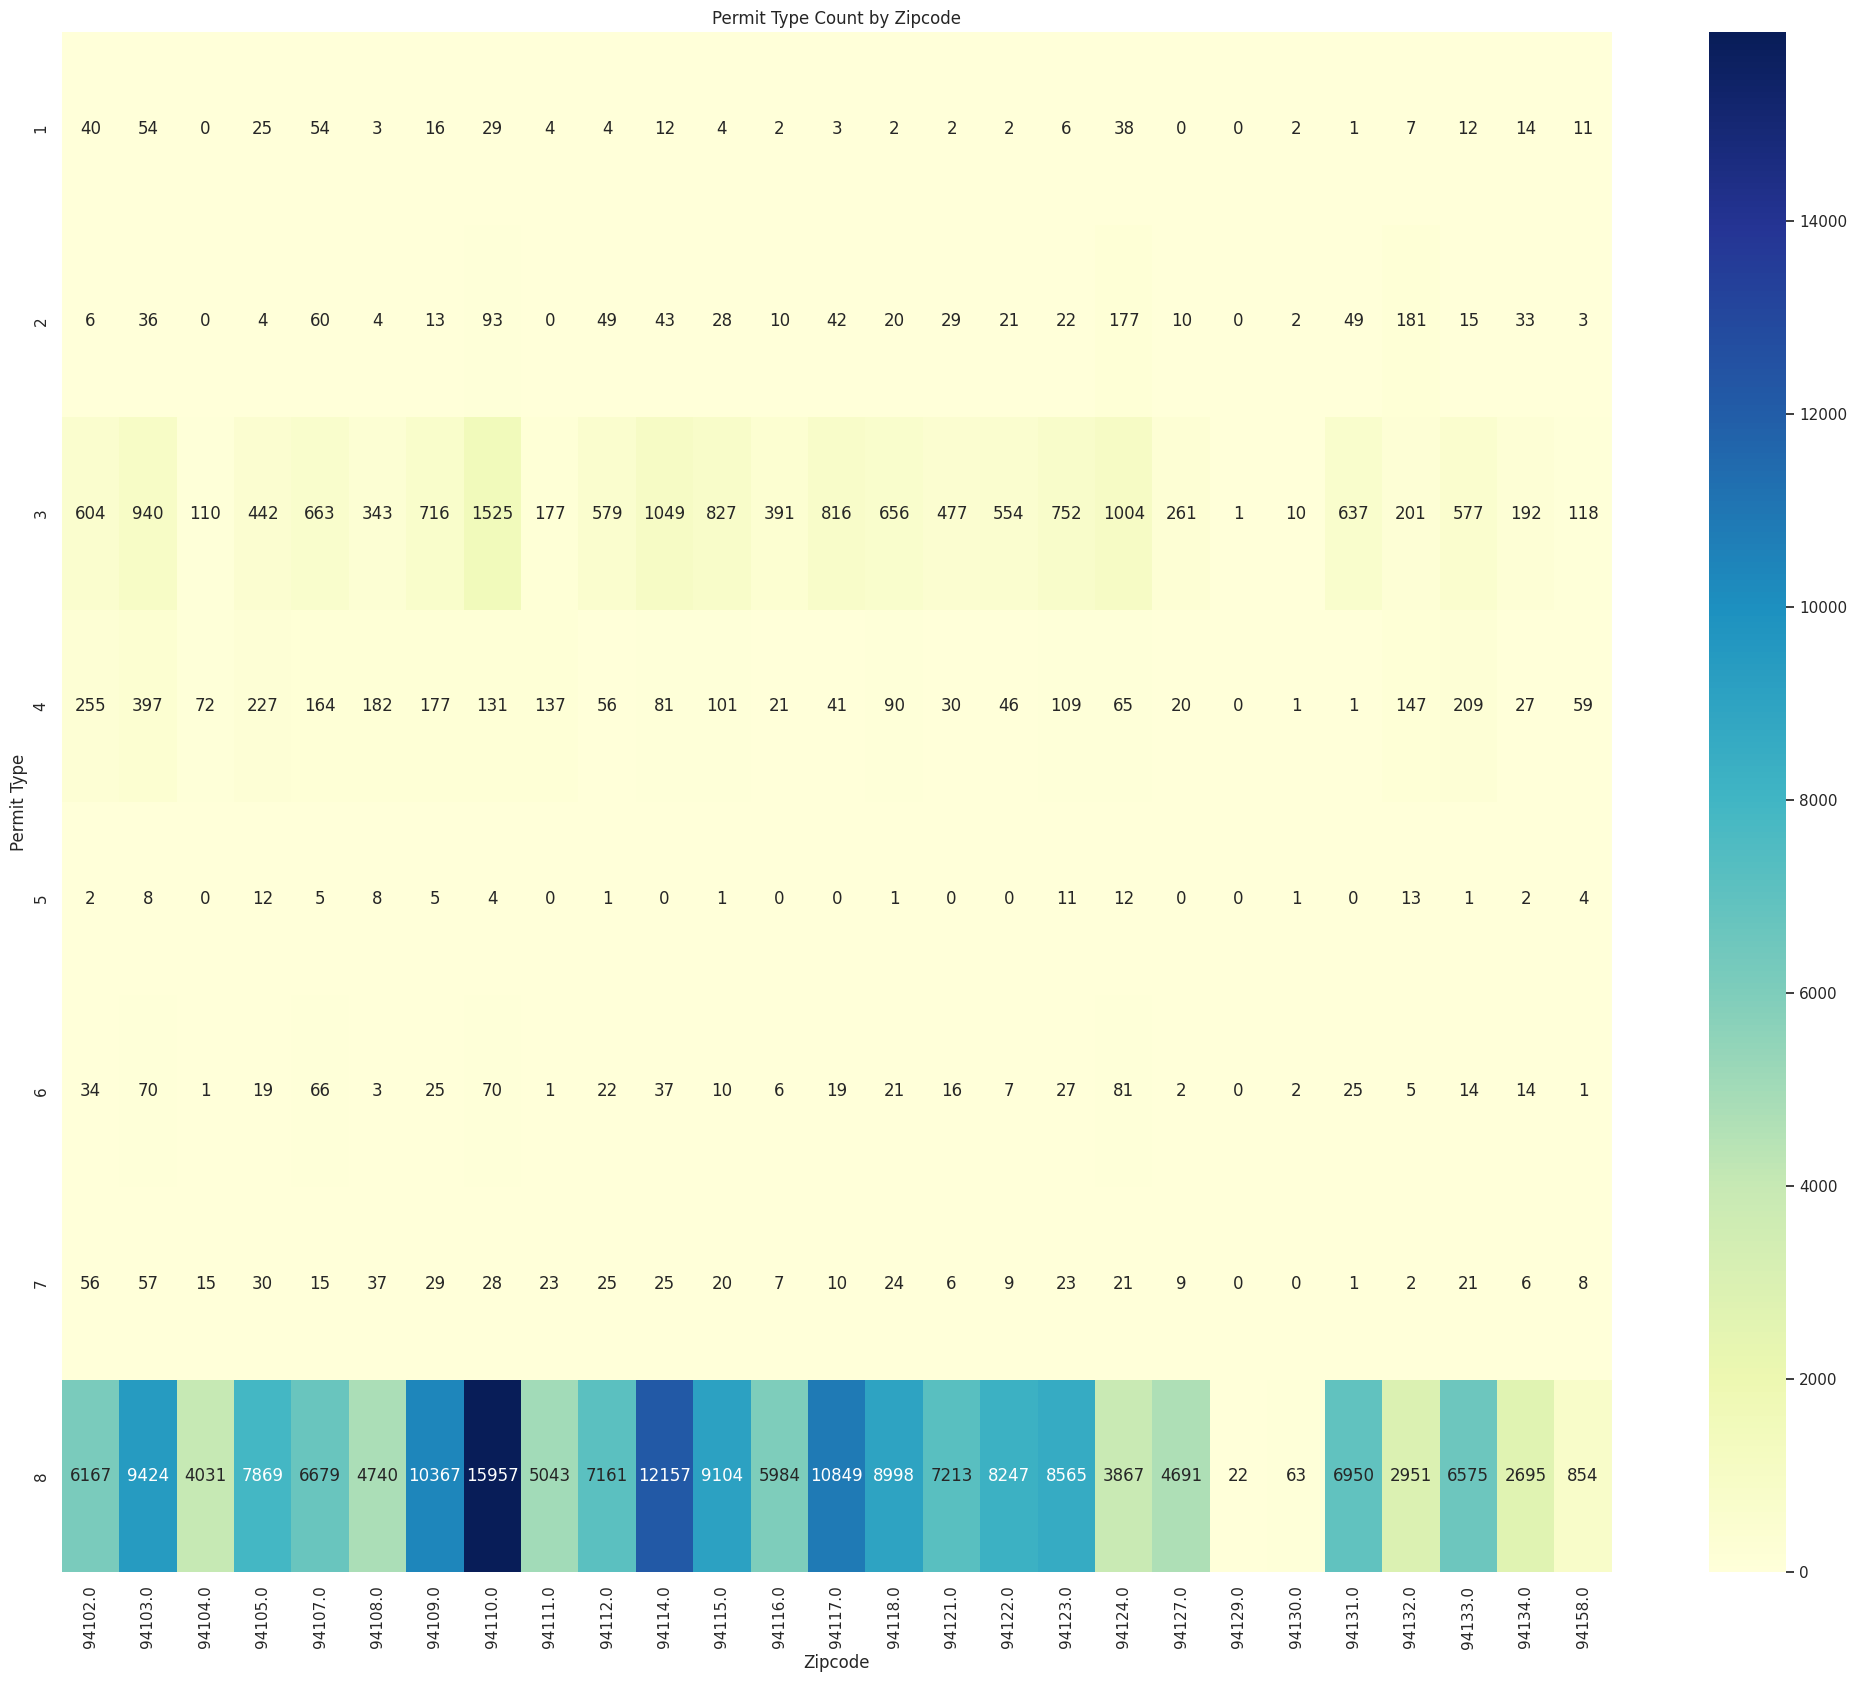

In [ ]:
plt.figure(figsize=(25, 20))
plt.title("Permit Type Count by Zipcode")
pivot_table = r_df.pivot_table(index="Permit Type", columns="Zipcode", aggfunc="size", fill_value=0)
sns.heatmap(pivot_table, cmap="YlGnBu", annot=True, fmt="d")
plt.show()

<ipython-input-135-334450209749>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Permit Type", y="Zipcode", data=r_df, estimator=lambda x: len(x) / len(df) * 100, ci=None)


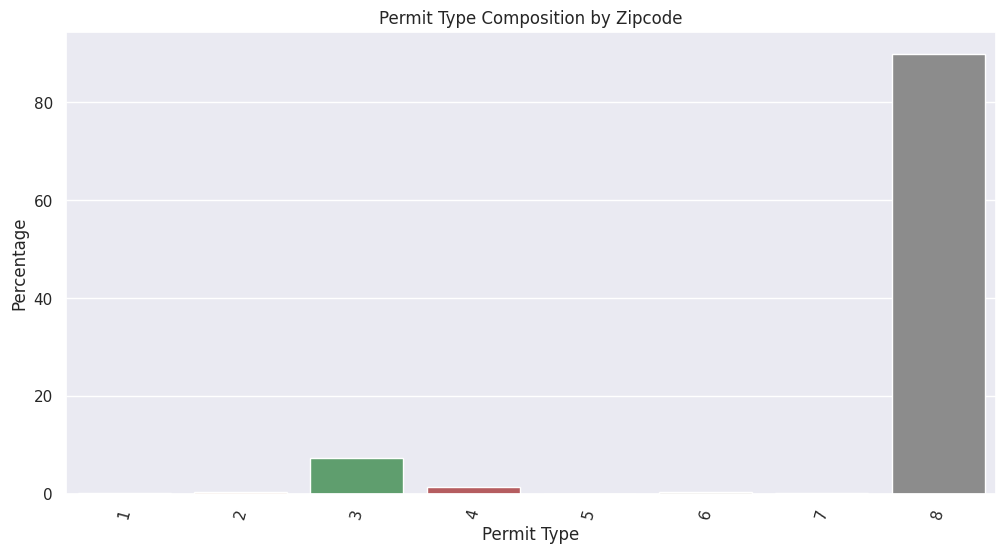

In [ ]:
plt.figure(figsize=(12, 6))
plt.xticks(rotation=75)
plt.title("Permit Type Composition by Zipcode")
sns.barplot(x="Permit Type", y="Zipcode", data=r_df, estimator=lambda x: len(x) / len(df) * 100, ci=None)
plt.ylabel("Percentage")
plt.show()

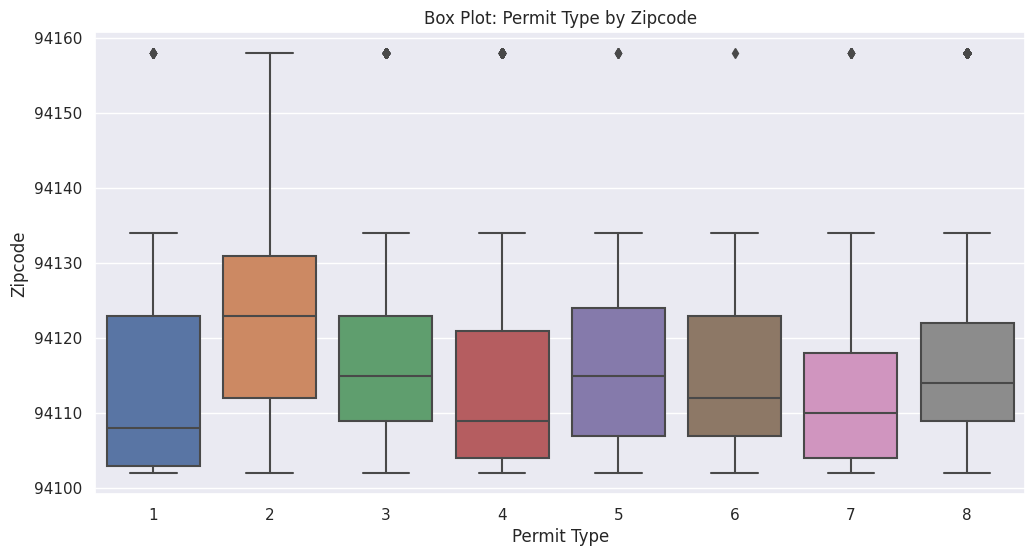

In [ ]:
plt.figure(figsize=(12, 6))
plt.title("Box Plot: Permit Type by Zipcode")
sns.boxplot(x="Permit Type", y="Zipcode", data=r_df)
plt.show()

We observed that Pemits are alloted to a limited number of zipcodes/ divisons. This means that new construction of building is trending to a limited number of specific area defined buildings only

# Predictive Analysis


In [ ]:
r_df['Current Status'].unique()

array([0, 1])

In [ ]:
features = r_df.columns[r_df.columns != 'Current Status']
X = r_df[features].copy()


In [ ]:
y= r_df['Current Status']

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26686 entries, 3 to 39057
Data columns (total 48 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Permit Type                               26686 non-null  int64  
 1   Block                                     26686 non-null  object 
 2   Lot                                       26686 non-null  object 
 3   Street Number                             26686 non-null  int64  
 4   Street Name                               26686 non-null  object 
 5   Street Suffix                             26686 non-null  object 
 6   Description                               26686 non-null  object 
 7   Number of Existing Stories                26686 non-null  float64
 8   Number of Proposed Stories                26686 non-null  float64
 9   Estimated Cost                            26686 non-null  float64
 10  Revised Cost                      

In [ ]:
X['Zipcode'] = X['Zipcode'].astype('O')
X['Permit Type'] = X['Permit Type'].astype('O')
X['Street Number'] = X['Street Number'].astype('O')
X['Plansets'] = X['Plansets'].astype('O')
X['SupervisorDistrict'] = X['Supervisor District'].astype('O')

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26686 entries, 3 to 39057
Data columns (total 49 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Permit Type                               26686 non-null  object 
 1   Block                                     26686 non-null  object 
 2   Lot                                       26686 non-null  object 
 3   Street Number                             26686 non-null  object 
 4   Street Name                               26686 non-null  object 
 5   Street Suffix                             26686 non-null  object 
 6   Description                               26686 non-null  object 
 7   Number of Existing Stories                26686 non-null  float64
 8   Number of Proposed Stories                26686 non-null  float64
 9   Estimated Cost                            26686 non-null  float64
 10  Revised Cost                      

In [ ]:
X = data.drop_columns(X,'Location')

In [ ]:
# lets generate 2 new features

In [ ]:
# coverting lattitude and longitude into distance from origin
from sklearn.preprocessing import StandardScaler
pca1 = StandardScaler()
X[['Latitude', 'Longitude']] = pca1.fit_transform(X[['Latitude', 'Longitude']])
X['DistanceFromCentre'] = (X['Latitude'] ** 2 + X['Longitude'] ** 2) ** (1/2)

In [ ]:
#Create feature representing amount of time between creation and getting current status of application
X['Creation To Current_duration'] = (X['Current Status Date_seconds'] - X['Permit Creation Date_seconds'])


#plot current status distribution across the region using lattitude longitude
# target = r_df['Current Status'].astype(str)
# X['Latitude'] = pd.to_numeric(X['Latitude'], errors='coerce')
# X['Longitude'] = pd.to_numeric(X['Longitude'], errors='coerce')
# y = y.astype(str)  # Convert 'y' column to string data type
# sns.set(rc={'figure.figsize': (20, 10)})
# sns.lmplot(data=pd.concat([X, pd.DataFrame(y, columns=['y'])], axis=1), x="Latitude", y="Longitude", hue= target, fit_reg=False ,palette='Set1')


In [ ]:
mi_scores = make_mi_scores(X, y)

<ipython-input-146-2ec6ce1981b8>:5: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  X[colname], _ = X[colname].factorize()
<ipython-input-146-2ec6ce1981b8>:5: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  X[colname], _ = X[colname].factorize()
<ipython-input-146-2ec6ce1981b8>:5: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  X[colname], _ = X[colname].factorize()
<ipython-input-146-2ec6ce1981b8>:5: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  X[colname], _ = X[colname].factorize()
<ipython-input-146-2ec6ce1981b8>:5: FutureWarning: In a future version, the Index constructo

Block                                       1.607314e-02
Current Status Date_seconds                 1.416512e-02
Street Number                               1.216482e-02
Creation To Current_duration                8.954426e-03
Permit Expiration Date_seconds              8.403973e-03
Permit Creation Date_seconds                7.638942e-03
Filed Date_seconds                          7.633134e-03
First Construction Document Date_seconds    7.322925e-03
Issued Date_seconds                         7.320433e-03
Street Name                                 5.923437e-03
Longitude                                   5.119547e-03
Latitude                                    4.608563e-03
DistanceFromCentre                          3.841337e-03
Supervisor District                         2.669833e-03
Number of Proposed Stories                  2.400854e-03
Lot                                         2.284940e-03
Number of Existing Stories                  1.906894e-03
Revised Cost                   

<ipython-input-146-2ec6ce1981b8>:13: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


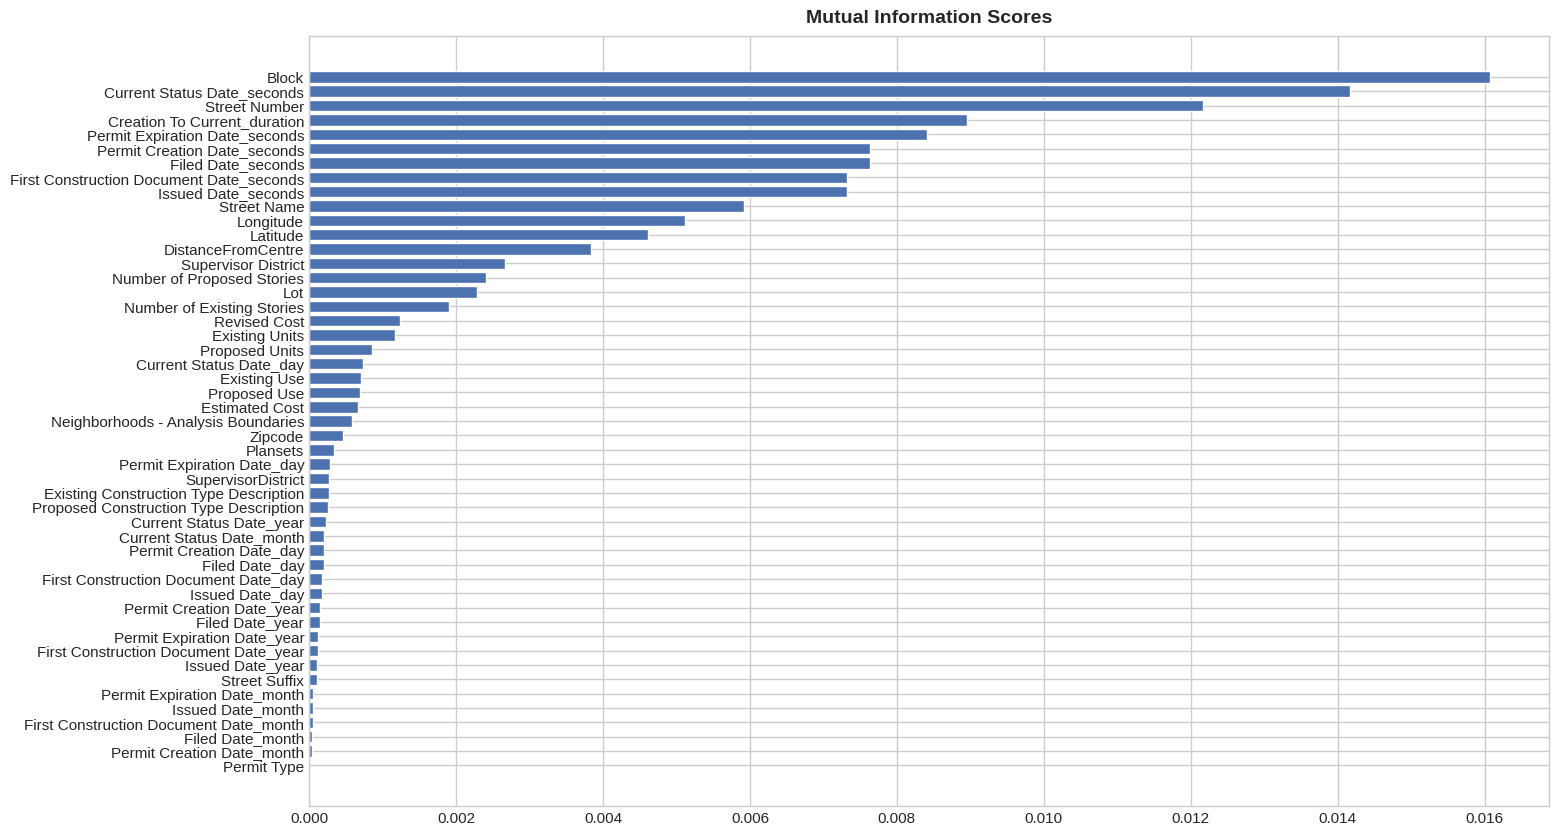

In [ ]:
from sklearn.feature_selection import mutual_info_classif
def make_mi_scores(X, y):
    X = X.copy()
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()
    # All discrete features should now have integer dtypes
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_classif(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores
def plot_mi_scores(scores):
    plt.style.use("seaborn-whitegrid")
    plt.rc("figure", autolayout=True)
    plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")
mi_scores = make_mi_scores(X, y)
print(mi_scores.head(50))
# print(mi_scores.tail(20))  # uncomment to see bottom 20

plt.figure(dpi=100, figsize=(16, 10))
plot_mi_scores(mi_scores)
# plot_mi_scores(mi_scores.tail(20))  # uncomment to see bottom 20

# Model Building And training

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

# Define your categorical features
categorical_features = [c for c in X.columns if X[c].dtype == 'object']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the categorical transformer
cat_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Create the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', cat_transformer, categorical_features)
    ])

# Create the machine learning pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier())  # Use RandomForestClassifier as an example
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Calculate the accuracy of the predictions
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9883394431011622


In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9883394431011622


In [ ]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     25391
           1       0.25      0.10      0.14       251

    accuracy                           0.99     25642
   macro avg       0.62      0.55      0.57     25642
weighted avg       0.98      0.99      0.99     25642



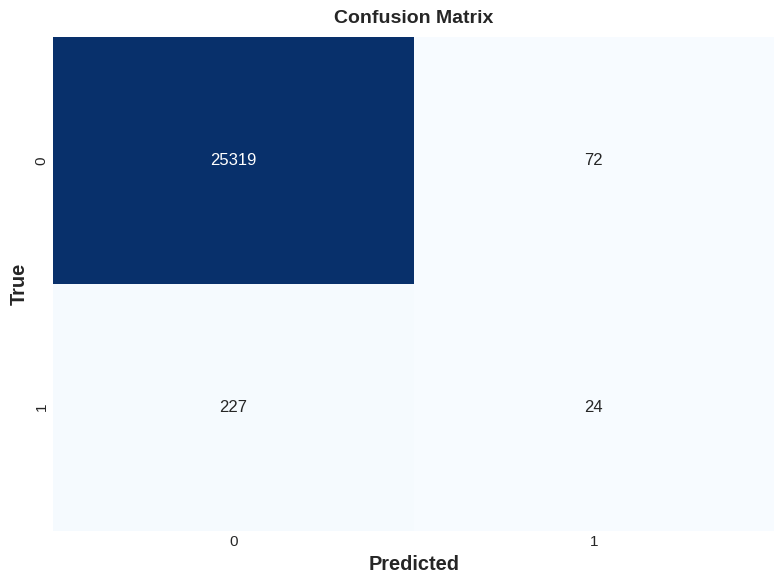

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

Results suggest that our model has a high accuracy overall, but it struggles to correctly predict instances of class '1' (low recall and precision). This imbalance in performance between the two classes is reflected in the macro-average and weighted-average values, where the macro-average F1-score is 0.57 and the weighted-average F1-score is 0.99.

Also We can see that clearly the our Label column is imbalanced. This could be improved but as we did this as a practice assignment so we can leave it for future improvements for now